In [8]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm

dic = {'User-Agent' : 'Mozilla/5.0 (Macintoshi; intel Mac OS X 12_6)'}

total = []

for n in tqdm(range(1, 696)): # tqdm for 문의 진행상황을 알려줌

    url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page={}".format(n), headers = dic)
    html = BeautifulSoup(url.text)

    table = html.find('table')
    table = pd.read_html(str(table))[0].dropna()
    del table['전일비']
    total.append(table)
    time.sleep(0.1)

100%|██████████| 695/695 [10:31<00:00,  1.10it/s]


In [9]:
len(total)

695

In [11]:
samsung = pd.concat(total, ignore_index=True)
samsung

,날짜,종가,시가,고가,저가,거래량
0,2024.03.13,74100.0,73700.0,74100.0,73500.0,15152545.0
1,2024.03.12,73300.0,72600.0,73500.0,72100.0,13011654.0
2,2024.03.11,72400.0,72900.0,73100.0,72300.0,9740504.0
3,2024.03.08,73300.0,72800.0,73400.0,72600.0,19271349.0
4,2024.03.07,72200.0,73100.0,73300.0,72200.0,14516963.0
...,...,...,...,...,...,...
6945,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
6946,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
6947,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
6948,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0


In [12]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6950 non-null   object 
 1   종가      6950 non-null   float64
 2   시가      6950 non-null   float64
 3   고가      6950 non-null   float64
 4   저가      6950 non-null   float64
 5   거래량     6950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 325.9+ KB


In [13]:
samsung['날짜']=pd.to_datetime(samsung['날짜'])
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6950 non-null   datetime64[ns]
 1   종가      6950 non-null   float64       
 2   시가      6950 non-null   float64       
 3   고가      6950 non-null   float64       
 4   저가      6950 non-null   float64       
 5   거래량     6950 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 325.9 KB


In [14]:
samsung = samsung[::-1]
samsung

,날짜,종가,시가,고가,저가,거래량
6949,1996-06-25,67500.0,66500.0,68300.0,65600.0,112960.0
6948,1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0
6947,1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0
6946,1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
6945,1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
4,2024-03-07,72200.0,73100.0,73300.0,72200.0,14516963.0
3,2024-03-08,73300.0,72800.0,73400.0,72600.0,19271349.0
2,2024-03-11,72400.0,72900.0,73100.0,72300.0,9740504.0
1,2024-03-12,73300.0,72600.0,73500.0,72100.0,13011654.0


In [15]:
samsung.index = range(len(samsung))
samsung

,날짜,종가,시가,고가,저가,거래량
0,1996-06-25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6945,2024-03-07,72200.0,73100.0,73300.0,72200.0,14516963.0
6946,2024-03-08,73300.0,72800.0,73400.0,72600.0,19271349.0
6947,2024-03-11,72400.0,72900.0,73100.0,72300.0,9740504.0
6948,2024-03-12,73300.0,72600.0,73500.0,72100.0,13011654.0


In [18]:
data = []
target = []

for i in range(len(samsung)-1):
        a = list(samsung.iloc[i, 1:])
        b = samsung.iloc[i+1, 1]
        data.append(a)
        target.append(b)

In [19]:
import numpy as np

data = np.array(data)
target = np.array(target)

In [20]:
data.shape

(6949, 5)

In [21]:
target.shape

(6949,)

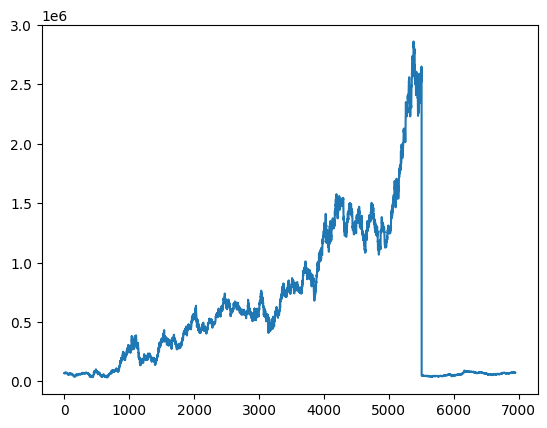

In [22]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

plt.plot(target)

In [23]:
rf = RandomForestRegressor()
rf.fit(data, target)

RandomForestRegressor()

In [27]:
a = list(samsung.iloc[-1][1:])
a

[74100.0, 73700.0, 74100.0, 73500.0, 15152545.0]

In [28]:
rf.predict([a]) # 2024.3.14 종가예측

array([73776.])